<a href="https://www.kaggle.com/code/eminecansuakgul/spaceshipchallenge?scriptVersionId=150257453" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Spaceship Titanic

Kozmik bir gizemi çözmek için veri bilimi becerilerinize ihtiyaç duyulan 2912 yılına hoş geldiniz. Dört ışık yılı öteden bir ileti aldık ve işler hiç de iyi görünmüyor.

Uzay Gemisi Titanik bir ay önce fırlatılan yıldızlararası bir yolcu gemisiydi. İçinde yaklaşık 13,000 yolcusu bulunan gemi, güneş sistemimizden göç edenleri yakın yıldızların yörüngesindeki yeni yaşanabilir üç dış gezegene taşımak üzere ilk yolculuğuna çıktı.

İlk varış noktası olan 55 Cancri E'ye giderken Alpha Centauri'yi dönerken, dikkatsiz Uzay Gemisi Titanic bir toz bulutu içinde gizlenmiş bir uzay-zaman anomalisiyle çarpıştı. Ne yazık ki, 1000 yıl önceki adaşı ile benzer bir kaderle karşılaştı. Gemi sağlam kalsa da, yolcuların neredeyse yarısı alternatif bir boyuta taşındı!

Kurtarma ekiplerine yardım etmek ve kayıp yolcuları geri getirmek için, uzay gemisinin hasarlı bilgisayar sisteminden kurtarılan kayıtları kullanarak hangi yolcuların anomali tarafından taşındığını tahmin etmeniz isteniyor.

In [1]:
#importing libraries
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

### Reading dataset

In [2]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

### Exploratory data analysis (EDA)

In [3]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Fark edilirse bazı featureların Non-null Değerleri satır sayısından az. Bu da eksik verilerin olduğunun bir göstergesidir.
* HomePlanet için -> 8693 - 8492 = 201

In [5]:
train.shape #we can check info() func too

(8693, 14)

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
train.describe() #only numerical values

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


#### Datasetimizde eksik değerlerin sayısı

In [8]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
train['Transported'].describe()

count     8693
unique       2
top       True
freq      4378
Name: Transported, dtype: object

In [10]:
#Numerical Columns 
numerical_columns =  train.select_dtypes(include=['float64', 'int64'])

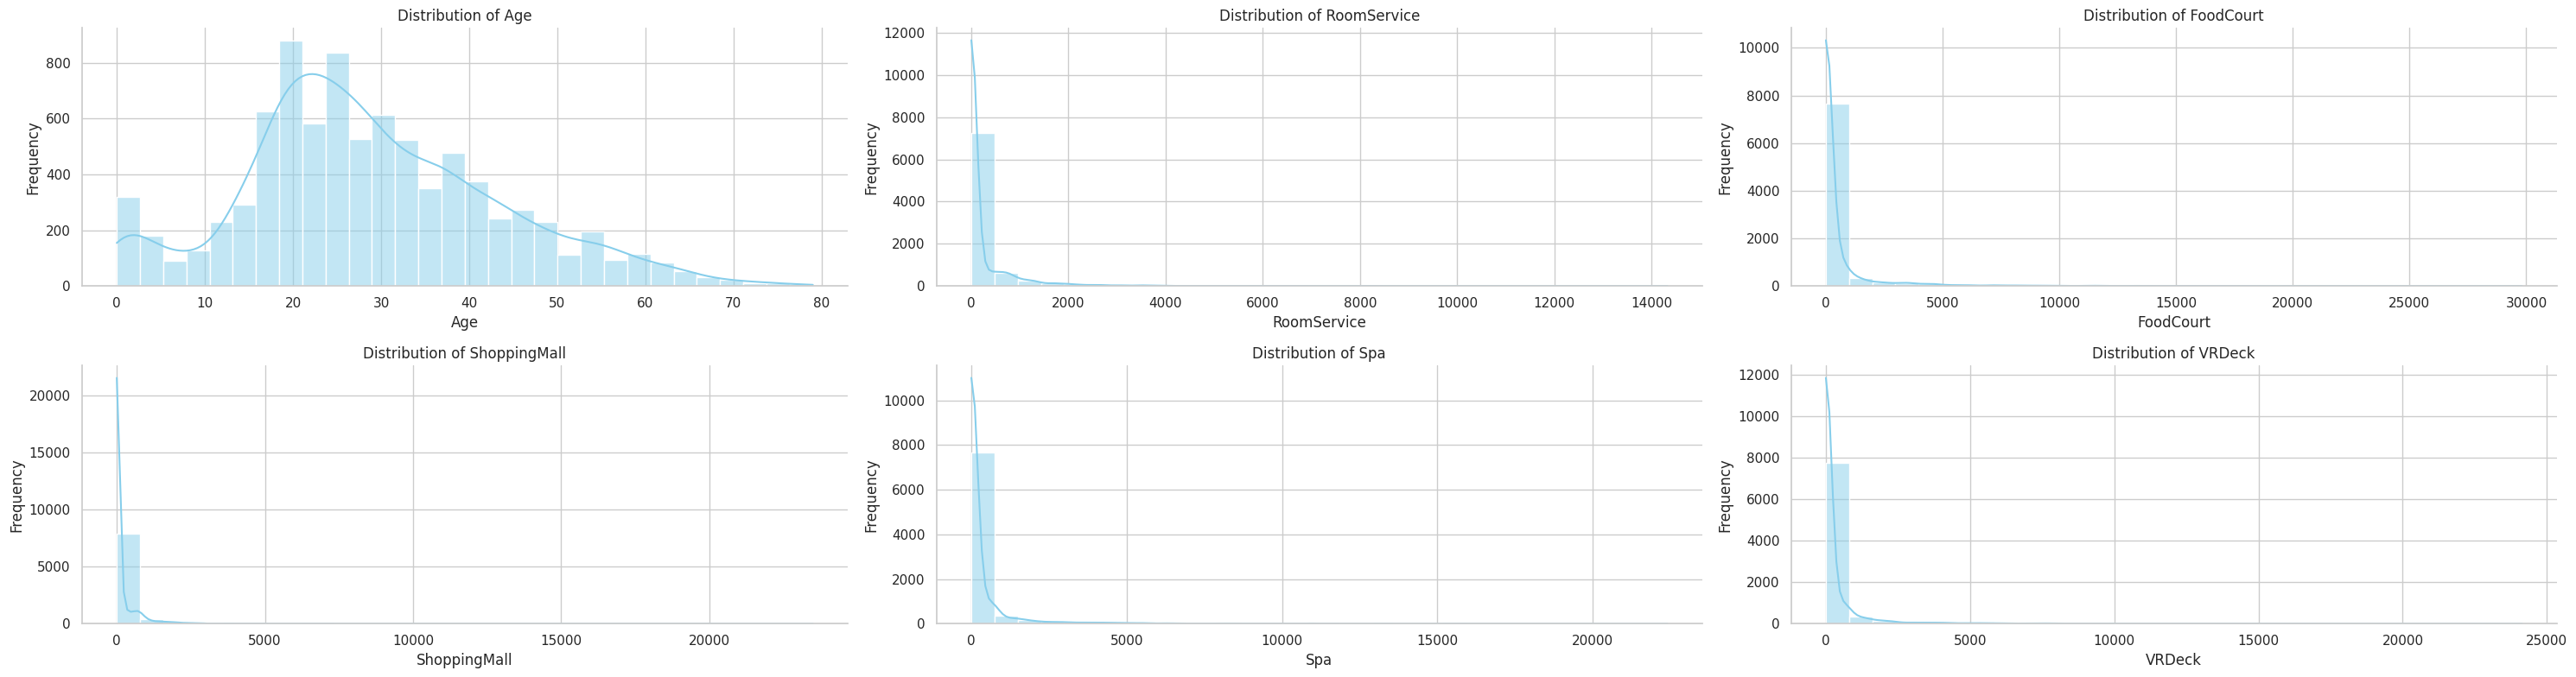

In [11]:
sns.set(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(30, 8))

# Loop through each numerical column and plot a histogram
for i, column in enumerate(numerical_columns.columns):
    plt.subplot(2, 3, i + 1)  
    sns.histplot(train[column].dropna(), kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    sns.despine()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

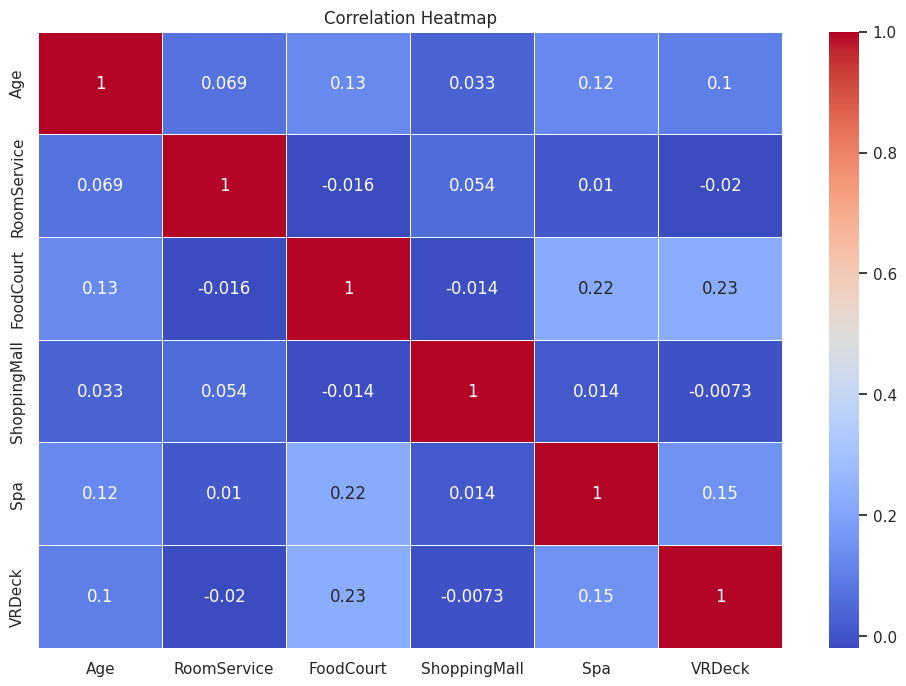

In [12]:
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

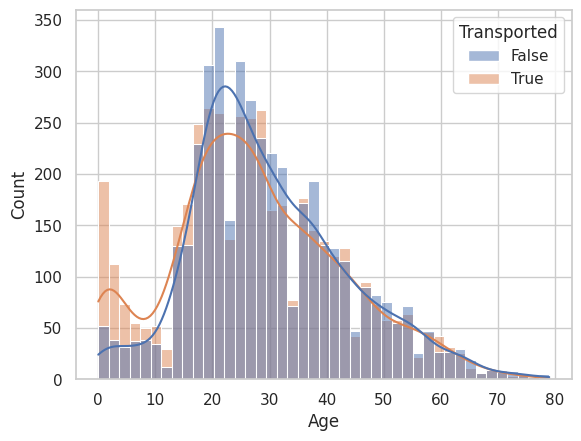

In [13]:
sns.histplot(train,x='Age',hue='Transported',kde=True)

In [14]:
train['Age'].skew()

0.41909658301471536

In [15]:
train[['Deck','Num','Port']] = train['Cabin'].str.split('/',expand=True) #the split elements will expand out into separate columns
test[['Deck','Num','Port']] = test['Cabin'].str.split('/',expand=True)

In [16]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Port
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [17]:
train = train.drop(columns=['PassengerId','Cabin','Name','Num'],axis=1)
test = test.drop(columns=['PassengerId','Cabin','Name','Num'],axis=1)

In [18]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


In [19]:
categorical_columns = train.select_dtypes(include='object')
categorical_description = train[categorical_columns.columns].describe().transpose()
categorical_description


,count,unique,top,freq
HomePlanet,8492,3,Earth,4602
CryoSleep,8476,2,False,5439
Destination,8511,3,TRAPPIST-1e,5915
VIP,8490,2,False,8291
Deck,8494,8,F,2794
Port,8494,2,S,4288


In [20]:
most_frequent_values = categorical_columns.mode().iloc[0]
most_frequent_values

HomePlanet           Earth
CryoSleep            False
Destination    TRAPPIST-1e
VIP                  False
Deck                     F
Port                     S
Name: 0, dtype: object

In [21]:
train[categorical_columns.columns] = train[categorical_columns.columns].fillna(most_frequent_values)
print(train[categorical_columns.columns].isnull().sum())

HomePlanet     0
CryoSleep      0
Destination    0
VIP            0
Deck           0
Port           0
dtype: int64


In [22]:
test[categorical_columns.columns] = test[categorical_columns.columns].fillna(most_frequent_values)
print(test[categorical_columns.columns].isnull().sum())

HomePlanet     0
CryoSleep      0
Destination    0
VIP            0
Deck           0
Port           0
dtype: int64


In [23]:
train[numerical_columns.columns] = numerical_columns.apply(lambda col: col.fillna(col.mode().iloc[0]))
test[numerical_columns.columns] = numerical_columns.apply(lambda col: col.fillna(col.mode().iloc[0]))

In [24]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Port            0
dtype: int64

In [25]:
test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Port            0
dtype: int64

### One-Hot Encoding

In [26]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Port
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S


In [27]:
categorical_columns.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Port'], dtype='object')

In [28]:
train_encoded = pd.get_dummies(train, columns=categorical_columns.columns,  dtype=int)
test_encoded = pd.get_dummies(test, columns=categorical_columns.columns,  dtype=int)

In [29]:
expenditure = ['VRDeck','Spa','RoomService','FoodCourt','ShoppingMall']
train[expenditure] = train[expenditure].apply(np.log1p)
test[expenditure] = test[expenditure].apply(np.log1p)

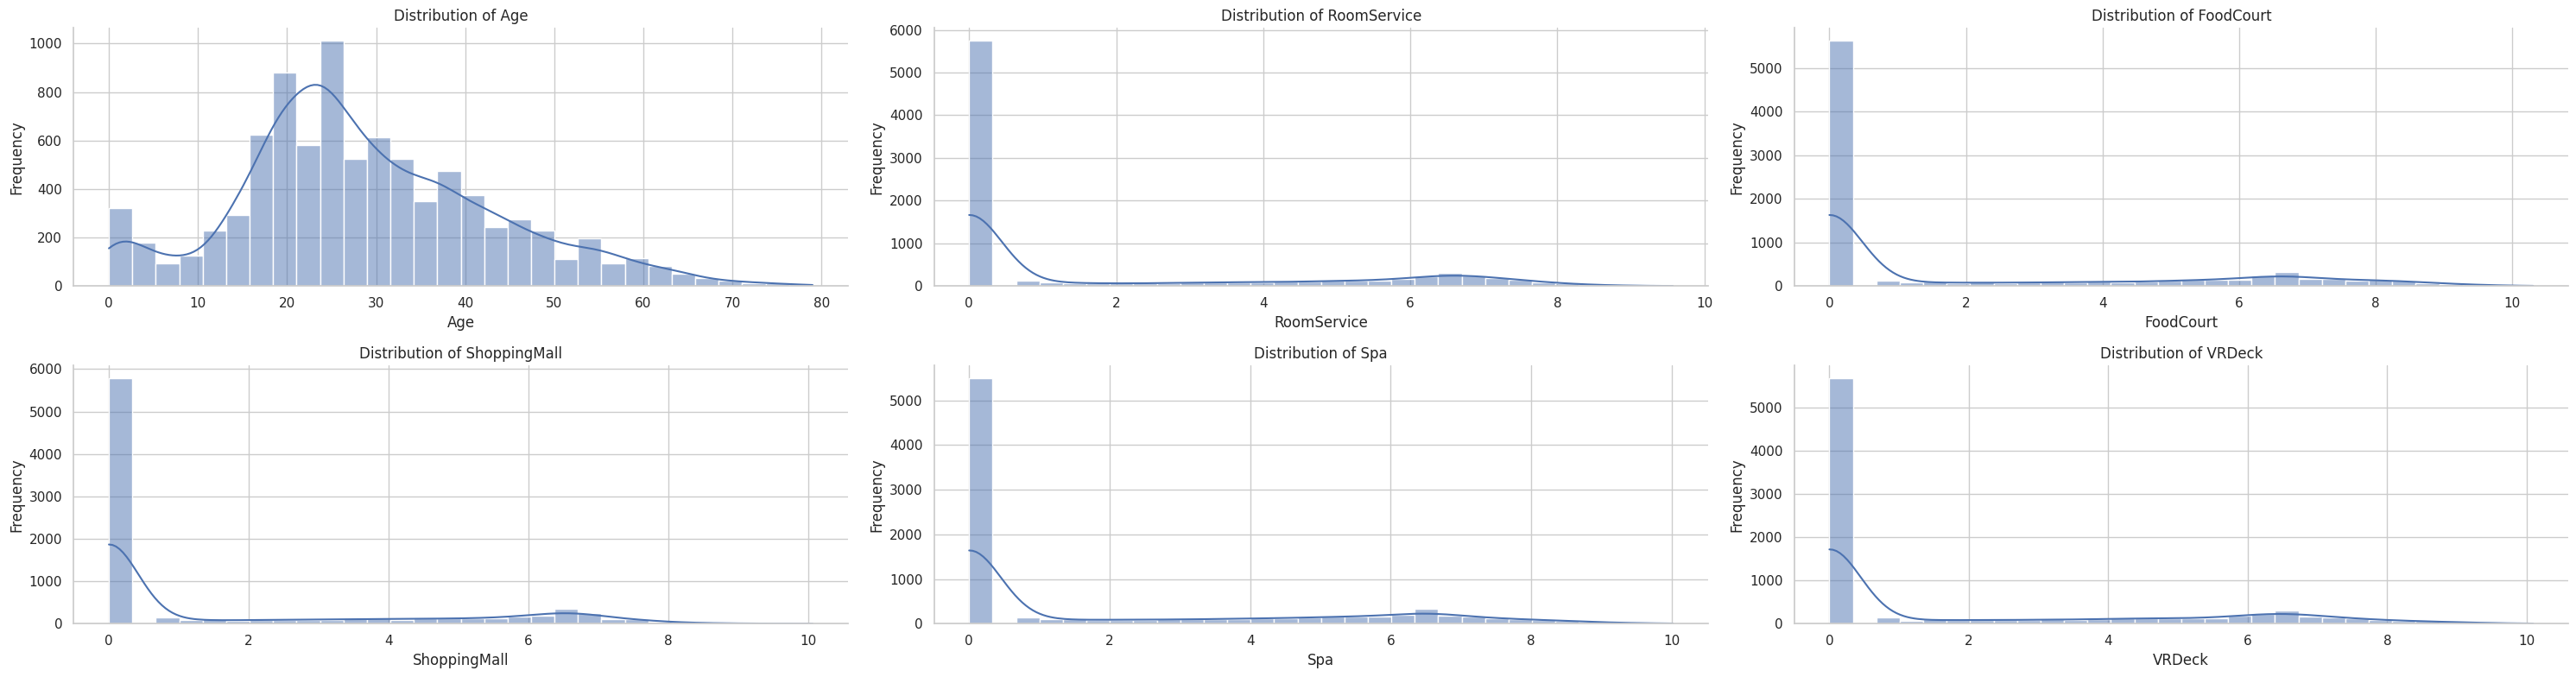

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(30, 8))

for i, column in enumerate(numerical_columns.columns):
    plt.subplot(2, 3, i + 1)  
    sns.histplot(train[column].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    sns.despine()

plt.tight_layout() #Automatically adjust subplot parameters to give specified padding
plt.show()

In [31]:
train_encoded

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Port_P,Port_S
0,39.0,0.0,0.0,0.0,0.0,0.0,False,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,0,1,0,...,1,0,0,0,0,0,0,0,0,1
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,0,1,0,...,1,0,0,0,0,0,0,0,1,0
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,1,0,0,...,0,0,0,0,0,0,1,0,0,1
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,1,0,0,...,0,0,0,0,0,0,1,0,0,1
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,0,1,0,...,0,0,0,0,1,0,0,0,0,1


### Standard Scaler ile Verimizi Scale Edelim 

In [32]:
from sklearn.preprocessing import StandardScaler

num_cols = numerical_columns.columns
sc= StandardScaler()
train_encoded[num_cols] = sc.fit_transform(train_encoded[num_cols])
test_encoded[num_cols] = sc.transform(test_encoded[num_cols])

### True False yerine 0 ve 1 kullanalım

In [33]:
train_encoded['Transported'] = train_encoded['Transported'].astype(int)

### Random Forest Classifier ile Modelimizi oluşturalım

* Random Forest Classifier nasıl çalışır?

Random Forest Classifier'da, verilerin ve özelliklerin farklı rastgele alt kümeleri kullanılarak birden fazla decision tree oluşturulur. Her bir decision tree, verilerin nasıl sınıflandırılacağı konusunda görüş bildiren bir uzman gibidir. Tahminler, her bir karar ağacı için tahmin hesaplanarak ve ardından en popüler sonuç alınarak yapılır. (Regresyon için tahminler bunun yerine bir ortalama tekniği kullanır).

![Random Forest](https://miro.medium.com/v2/resize:fit:1400/1*jE1Cb1Dc_p9WEOPMkC95WQ.png)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

target_variable = 'Transported'

# Features (X) and target variable (y)
X = train_encoded.drop(target_variable, axis=1)
y = train_encoded[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')

# Additional metrics
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 78.38%
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       861
           1       0.80      0.76      0.78       878

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



### Prediction

In [35]:
y_pred_test = rf_model.predict(test_encoded)

## Submission

In [36]:
sub = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')

In [37]:
sub['Transported'] = y_pred_test

In [38]:
sub['Transported'] = sub['Transported'].astype(bool)

In [39]:
sub.to_csv('submission.csv',index=False)

In [40]:
sub

,PassengerId,Transported
0,0013_01,True
1,0018_01,True
2,0019_01,False
3,0021_01,False
4,0023_01,True
...,...,...
4272,9266_02,False
4273,9269_01,True
4274,9271_01,True
4275,9273_01,False


## References
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
* https://datacamp.com/tutorial/random-forests-classifier-python